#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


##  Section A: Data Exploration and Preprocessing (20 marks)

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [2]:
from tensorflow.keras.datasets import cifar100

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Print shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

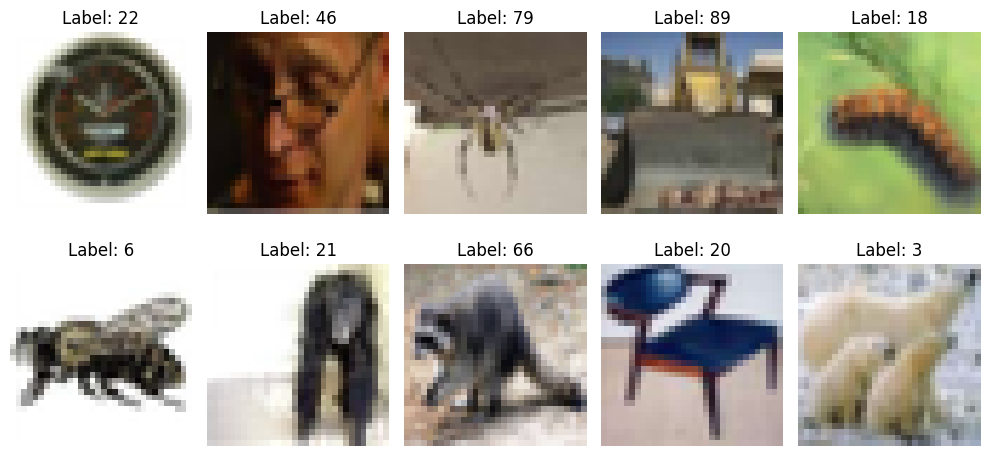

In [4]:

import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), _ = cifar100.load_data(label_mode='fine')
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

In [5]:
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

**Answer:**

The normalization and one hot encode is  done for faster and efficient working of training data in neural networks.
The main purpose of normalization is to scales image pixel values from [0, 255] to [0, 1] so that all input features have the same scale.

One-hot Encoding converts categorical labels into binary vectors where the index of the class is 1 and the rest are 0 which is important in multi-class classification with softmax activation, allowing the model to output probabilities for each class.

**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

When working with 100 classes, models require more data and is very difficult to identify classes.

 The challenges are

 Overfitting

 Slower training

 Increased misclassification.

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       230,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,892 (976.14 KB)

 Trainable params: 249,892 (976.14 KB)

 Non-trainable params: 0 (0.00 B)

**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 56ms/step - accuracy: 0.1014 - loss: 3.9913 - val_accuracy: 0.2528 - val_loss: 3.1765
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 50ms/step - accuracy: 0.2726 - loss: 3.0287 - val_accuracy: 0.3104 - val_loss: 2.8588
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.3330 - loss: 2.7233 - val_accuracy: 0.3422 - val_loss: 2.7163
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.3677 - loss: 2.5498 - val_accuracy: 0.3540 - val_loss: 2.6492
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.3905 - loss: 2.4130 - val_accuracy: 0.3683 - val_loss: 2.5865
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.4153 - loss: 2.2980 - val_accuracy: 0.3759 - val_loss: 2.5288
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.4374 - loss: 2.1992 - val_accuracy: 0.3859 - val_loss: 2.4870
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4500 

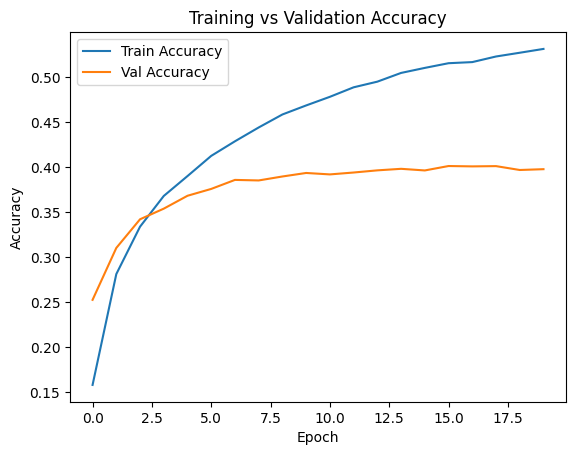

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3996 - loss: 2.4816
Final Test Accuracy: 0.3977999985218048



Final Test Accuracy:


From the graph, the validation accuracy fluctuates around 40%, while training accuracy reaches about 56%, loss = 2.5, which is high for a classification problem.


Analysis:

1. Overfitting Evidence

The model performs significantly better on training data than validation data.

This suggests the model is overfitting — learning the training data well but failing to generalize to unseen data.

2. High Loss Value

A loss of 2.5 indicates that the predictions are far from the true labels (for 100 classes, perfect cross-entropy loss would be close to 0).

This also supports the idea that the model is not learning the class distribution effectively.

3. Model Needs Tuning

The model likely lacks regularization (e.g., dropout, batch normalization).

The architecture or learning rate might not be optimal.

The class imbalance or difficulty of CIFAR-100 (compared to CIFAR-10) may also contribute.



Suggestions to Improve:

Add Dropout layers (e.g., Dropout(0.3) after dense layers).

Apply data augmentation to increase variety.

Try early stopping and learning rate scheduling.

Use BatchNormalization to stabilize learning.

Try label smoothing or deeper CNN architectures like ResNet for better accuracy.

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [ ]:
model_deep = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(100, activation='softmax')
])
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_deep.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.0536 - loss: 4.2581 - val_accuracy: 0.1776 - val_loss: 3.4951
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - accuracy: 0.1711 - loss: 3.4816 - val_accuracy: 0.2442 - val_loss: 3.1762
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.2192 - loss: 3.2329 - val_accuracy: 0.2824 - val_loss: 2.9766
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.2491 - loss: 3.0796 - val_accuracy: 0.2922 - val_loss: 2.9188
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.2664 - loss: 2.9703 - val_accuracy: 0.3102 - val_loss: 2.8029
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 55ms/step - accuracy: 0.2858 - loss: 2.8780 - val_accuracy: 0.3334 - val_loss: 2.6783
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 53ms/step - accuracy: 0.2996 - loss: 2.7884 - val_accuracy: 0.3327 - val_loss: 2.6656
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.3

Adding a third conv block improved accuracy by extracting more complex features, though it may increase training time.

**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [8]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar100.load_data(label_mode='coarse')
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0
y_train_c = to_categorical(y_train_c, 20)
y_test_c = to_categorical(y_test_c, 20)

model_coarse = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(20, activation='softmax')
])
model_coarse.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_coarse.fit(x_train_c, y_train_c, epochs=15, validation_data=(x_test_c, y_test_c))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.2106 - loss: 2.5637 - val_accuracy: 0.3559 - val_loss: 2.1209
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.3632 - loss: 2.0933 - val_accuracy: 0.4075 - val_loss: 1.9468
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.4105 - loss: 1.9201 - val_accuracy: 0.4360 - val_loss: 1.8549
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4499 - loss: 1.7948 - val_accuracy: 0.4489 - val_loss: 1.7954
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.4618 - loss: 1.7341 - val_accuracy: 0.4731 - val_loss: 1.7151
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4817 - loss: 1.6755 - val_accuracy: 0.4745 - val_loss: 1.7080
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.4896 - loss: 1.6409 - val_accuracy: 0.4733 - val_loss: 1.7121
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.5054 -

The model trained on coarse labels achieved higher accuracy of 54% because distinguishing 20 classes is easier than 100.

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

Dropout is a regularization technique that  randomly disables neurons during training, preventing overfitting by reducing reliance on specific neurons.

Removing it may lead to high training
accuracy  but poor generalization on test data.

This prevents the model from relying too heavily on specific neurons.

During inference/testing, all neurons are used, but their outputs are scaled to match the expected activation.

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?


Softmax converts logits to probabilities that sum to 1, enabling the model to output a clear probability distribution across classes and choose the most likely class.

The softmax activation function is used in the output layer of a CNN for multi-class classification problems, such as CIFAR-100 where there are 100 classes.

Each output value becomes a probability between 0 and 1.

Ensures the sum of output probabilities equals 1:

This property makes it easier to interpret the outputs as the model’s confidence for each class.

Facilitates choosing the predicted class:

The class with the highest softmax probability is taken as the predicted label.

The softmax activation in the output layer enables the CNN to output meaningful class probabilities and is essential for training with categorical cross-entropy loss and making predictions in multi-class classification tasks.

**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

CNN improvements for training speed and reducing overfitting includes:

Using BatchNormalization to stabilize learning.

Add GlobalAveragePooling2D instead of Flatten to reduce parameters.

Use smaller filters to reduce computation.

Increase Dropout for stronger regularization.

Try data augmentation for more varied training data.

Early stopping